# personality analysis 

# - What is the business question?
a business trying to find out customers groups, which have the same characteristics, personality, ideas, age, and interests to find out patterns in customers and test on them some marketing camping, offers, and understand what they need and where to find them, by all tha tthe business will maximize the profit and develop it 

# Project Pipeline

## - data understanding 
   ###  - EDA and data wrangling 
   ##### - data cleaning
   ##### - feature engnireing  
   ##### - data vlsulization 


## - Data preprosiscing
   ##### - handling Outliers
   ##### - handling categorical features
   ##### - standardization
   ##### - Preforming PCA


## - modeling 
   #### -choes number of clusters 


## - evalution
## - deploment 

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv("marketing_campaign.csv",sep="\t")


# data understanding

### data cleaning 
   - missing data. 
   - duplicated rows.
   - incorrect datatypes.

   - missing data. 


In [4]:
for i in df.columns :
    x =df[i].isnull().sum()
    if x>0:
        print(round(x/df.shape[0]*100,2),'%',"missing in",i)


1.07 % missing in Income


- scinse the missing data is in income and it is countinoues data so we can replace the missing data with maen or knn scinsce the presantange of missing data is small so 
    we will replace missing data with mean 
    

In [23]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [24]:
df.isnull().sum().sum()

0

   - duplicated rows.

In [25]:
df.duplicated().sum()

0

   - incorrect datatypes.

In [26]:
# df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

- data now is in corected data types ✔️

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-null   i

# now data is cleaned ✔️✔️✔️

- -----------------------------------------------------------------------------------------

#  feature Engenering 

In [28]:
df["TotalMnt"] = df['MntWines'] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
 

In [29]:
df["Age"] = 2022-df["Year_Birth"]

In [30]:
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [31]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [32]:
data=df.copy()

In [33]:
df.drop(df[df["Year_Birth"]<1920].index[0:],axis=0,inplace=True)
data.drop(data[data["Year_Birth"]<1920].index[0:],axis=0,inplace=True)

In [34]:
ones = df[df["Complain"]==1]

In [35]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalMnt,Age,Living_With
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,65,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,68,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,57,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,38,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,41,Partner


 - -----------

# Data visualization and Question answring 

In [36]:
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

# What is the type of important  data? 
   - Education      (categorical )
   - Marital_Status (categorical )
   - ----------------------------
   - Income  (numerical - continuous )
   - amount features (numerical - continuous )
   - ----------------------------
   - kidhome   (numerical-discrete)
   - Teenhome  (numerical-discrete)
   - Recency   (numerical-discrete)
   - purchases (numerical-discrete)
   - complain  (numerical-discrete)

# what is each row represent and how many rows is there ?  ✔️
- each row represent the characteristics and information about a customer 

In [37]:
df.shape[0]

2237

# - what is each column represnt and how many colmn is there? ✔️

In [38]:
df.shape[1]

32

- Check distributions ✔️ 
    - some features distribution like the normal distribution 

- Check outliers ✔️

- What is the best ten Customers ?

 - What is the evaluation method and Accuracy ?

- What exactly do you want to find out?

# what is the most Effective place to sell from and what is a ratio of each one of them?

In [39]:
import plotly.graph_objects as go

labels = ['Purchases-deals','Catalog-deals','Web-deals','Store-deals']
values = [df['NumDealsPurchases'].sum(), df['NumCatalogPurchases'].sum(), df['NumWebPurchases'].sum(), df['NumStorePurchases'].sum()]


fig = go.Figure(data=[go.Pie(labels=labels, values=values , pull= [0,0,.05,0])])

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# how many people complain and what are their characteristics ?

In [40]:

ones = df[df["Complain"]==1]
px.histogram(ones,y="Complain",x="Education", color="Living_With")

# which Educational categories  buys more?

In [41]:
px.box(df,x="Education",y="TotalMnt",color="Living_With")

# Exploring the Data 

In [42]:
px.histogram(df,x="Living_With")

In [43]:
px.histogram(df,x="Education", color="Living_With")

In [44]:
px.histogram(df,x="Age")

In [45]:
px.histogram(df,color="Living_With",x="TotalMnt")

In [46]:
px.histogram(data,x="Age", y="TotalMnt", color="Education")

In [47]:
px.histogram(df,y="TotalMnt",x="Living_With")

In [48]:
px.histogram(df,x="TotalMnt")

In [49]:
px.histogram(df,x="Recency")

# decision 

- after exploring the data I have decided to drop some features that I will not use in the machine learning model like marketing campaigns which is not a fact to put into consideration.

In [50]:
df.drop(['Marital_Status','Year_Birth', "ID",'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','Dt_Customer', 'Recency'],inplace=True , axis = 1)

 - ---------------------------------------

# data preprocssing 

- handling outliers ✔️
- encoding ✔️
- scaling ✔️
- pca ✔️

    

# handling outliers 

In [51]:
pip install datasist

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [52]:
from datasist.structdata import detect_outliers
columns = ['Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'TotalMnt', 'Age']

for col in columns:
    outliers_indices = detect_outliers(df, 0, [col])
    col_median = df[col].median()
    df[col].iloc[outliers_indices] = col_median

# handling catigorical features 

### binary encoding 

In [53]:
#import category_encoders as ce

#Education_encoder= ce.BinaryEncoder(cols=['Education'],return_df=True)
#Marital_encoder= ce.BinaryEncoder(cols=['Living_With'],return_df=True)

#Education_encoder.fit(df['Education']) 
#Education=Education_encoder.transform(df['Education'])



#Marital_encoder.fit(df['Living_With']) 
#Marital=Marital_encoder.transform(df['Living_With'])
#df=df.join(Education, lsuffix='_caller', rsuffix='_other')
#df=df.join(Marital, lsuffix='_caller', rsuffix='_other')


In [54]:
#df.drop(["Education","Living_With"], axis=1 , inplace=True )

In [55]:
#df.head()

### leable Encoder 

In [56]:
from sklearn import preprocessing
le_Education = preprocessing.LabelEncoder()
le_LivingWith = preprocessing.LabelEncoder()

le_Education.fit(df['Education'])
le_LivingWith.fit(df['Living_With'])



df['Education']=le_Education.transform(df['Education'])
df['Living_With']=le_LivingWith.transform(df['Living_With'])

print(le_Education.classes_)
print(le_LivingWith.classes_)



['Graduate' 'Postgraduate' 'Undergraduate']
['Alone' 'Partner']


In [57]:
df.head()

,Education,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalMnt,Age,Living_With
0,0,58138.0,0,0,635,8,546,12,8,88,3,8,10,4,7,1617,65,0
1,0,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,27,68,0
2,0,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,776,57,1
3,0,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,53,38,1
4,1,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,422,41,1


# standrdization 

- i realy  to choes normlization or standerdisatin but i deceted to use standrdization becuse my data follow the normal distubution and Normalizing usually is much worse because of outliers. Standardization is much more robust.Since Clustering is based on the distance between the feature points, it is imperative to scale down the features.

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_ds = pd.DataFrame(scaler.transform(df),columns= df.columns )


In [59]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalMnt,Age,Living_With
0,-0.894021,0.238956,-0.825388,-0.930227,1.000438,-0.423182,1.860422,-0.421841,-0.413490,0.994754,0.402651,1.433405,2.603845,-0.552077,0.702879,1.682247,1.017296,-1.348103
1,-0.894021,-0.234119,1.032151,0.906417,-0.870627,-0.612136,-0.706039,-0.620456,-0.596535,-0.720932,-0.150284,-1.125966,-0.574668,-1.167421,-0.130149,-0.961167,1.273722,-1.348103
2,-0.894021,0.779458,-0.825388,-0.930227,0.373751,0.683547,-0.130962,1.544445,-0.073550,0.032296,-0.703218,1.433405,-0.221500,1.293956,-0.546663,0.284064,0.333495,0.741783
3,-0.894021,-1.024235,1.032151,-0.930227,-0.870627,-0.531156,-0.639501,-0.461564,-0.544236,-0.741855,-0.150284,-0.760342,-0.927836,-0.552077,0.286365,-0.917941,-1.290534,0.741783
4,0.571125,0.245173,1.032151,-0.930227,-0.384870,0.521587,-0.173736,0.253449,0.083346,-0.532625,1.508521,0.336531,0.131668,0.063267,-0.130149,-0.304469,-1.034108,0.741783


In [60]:
scaled_ds.shape

(2237, 18)

# preforming PCA 

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T
PCA_ds.shape
PCA_ds.head()

,col1,col2,col3
0,2.585304,0.875128,0.560146
1,-2.409268,0.237348,-1.355573
2,2.034503,-0.229502,-0.116046
3,-2.597906,-1.268787,0.817458
4,-0.328537,-0.223623,1.548943


# Modeling

- choosing best number of clusters

# ElbowVisualizer

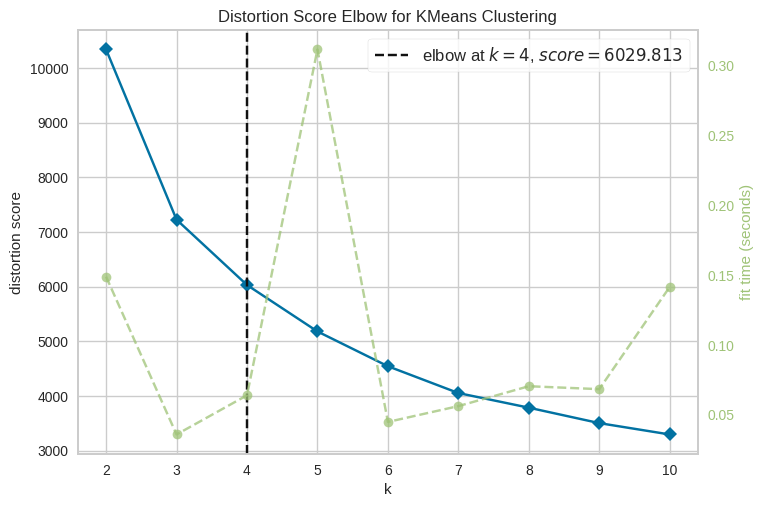

In [63]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show();


# AgglomerativeClustering

In [65]:
#from sklearn.cluster import AgglomerativeClustering
##Initiating the Agglomerative Clustering model 
#AC = AgglomerativeClustering(n_clusters=4)

##fit model and predict clusters
#yhat_AC = AC.fit_predict(PCA_ds)

#PCA_ds["Clusters"] = yhat_AC

##Adding the Clusters feature to the orignal dataframe.
#data["Clusters"]= yhat_AC 
#df["Clusters"]= yhat_AC 
#scaled_ds["Clusters"]=yhat_AC

# K-means clustring 

In [66]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=4, random_state=0 , n_init = 10 ).fit(PCA_ds)

yhat_K=kmeans.predict(PCA_ds)
data["Clusters"]= yhat_K
df["Clusters"]= yhat_K
scaled_ds["Clusters"]=yhat_K

In [67]:
data['Clusters'].head()

0    2
1    1
2    0
3    3
4    3
Name: Clusters, dtype: int32

# Evaluation 

In [68]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalMnt,Age,Living_With,Clusters
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,65,Alone,2
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,68,Alone,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,57,Partner,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,38,Partner,3
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,41,Partner,3


In [69]:
px.histogram(data,x="Age",color="Clusters")

In [70]:
px.histogram(data,x="Living_With",color="Clusters",)

In [71]:
df.drop(2233,axis=0,inplace=True)

In [72]:
px.scatter_3d(df,x="Age",y="Income",z="TotalMnt",color='Clusters')

In [73]:
b = data.groupby(by ='Clusters').count()
b['cls']=pd.DataFrame([0,1,2,3],columns= ['col'] )

In [74]:
labels = ["conunt clster'0'","conunt clster'1'","conunt clster'2'","conunt clster'3'"]
values = [b["ID"][0], b["ID"][1], b["ID"][2],b["ID"][3]]


fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_traces(textposition='inside', textinfo='percent+label', )
fig.show()

In [75]:
fig = px.bar(b, x= ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"],y="ID",color='cls' )
fig.show()

In [76]:
import plotly.express as px


fig = px.scatter(b,y='AcceptedCmp1', color= 'cls')
fig.update_traces(marker_size=100)
fig.show()

In [79]:
import plotly.express as px
from sklearn.datasets import load_digits
from umap import UMAP
digits = scaled_ds['Clusters']

umap_2d = UMAP(random_state=0)
umap_2d.fit(scaled_ds)

projections = umap_2d.transform(scaled_ds)

fig = px.scatter(
    projections, x=0, y=1,
    color=scaled_ds['Clusters'].astype(str), labels={'color': 'clusters'}
)
fig.show()

/home/taj/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



# small program 

# Tring to pridect ane row of customer data 



In [61]:
df.columns

In [62]:
df.drop(['Clusters'],inplace= True , axis= 1)

In [63]:
#row_data = [0,58138,0,0,700,88,546,172,88,88,3,10,4,5,5,1617,65,0]

#row_data[0] = le_LivingWith.transform(['Alone'])[0]
#row_data[17] = le_Education.transform(["Graduate"])[0]

#s = pd.DataFrame(scaler.transform([row_data]),columns= df.columns )

#g = pd.DataFrame(pca.transform(s), columns=(["col1","col2", "col3"]))
#g.head()


#kmeans.predict(g)


In [1]:
row_data=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
j=0
for i in df.columns:
    if i == "TotalMnt":
        row_data[j]=int(row_data[j-6])+int(row_data[j-7])+int(row_data[j-8])+int(row_data[j-9])+int(row_data[j-10])+int(row_data[j-11])
        j+=1
        continue
    print("Enter customer",i)
    x=input()
    row_data[j]=x
    if(i== "Living_With"):
        row_data[17] = le_LivingWith.transform([x])[0]
    if(i=="Education"):
        row_data[0] = le_Education.transform([x])[0]
    j+=1
for i in range(len(row_data)):
    row_data[i]=int(row_data[i])
print(row_data)    
customer_info = pd.DataFrame(scaler.transform([row_data]),columns= df.columns )

pca_customer = pd.DataFrame(pca.transform(customer_info), columns=(["col1","col2", "col3"])) 

print("predicted cluster =",kmeans.predict(pca_customer))

NameError: name 'df' is not defined


# The end